<a href="https://colab.research.google.com/github/Knightler/PyTorch-projects/blob/main/mnist_pratice01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# !pip install torchmetrics

In [11]:
import torch
import torch.nn as nn

import torchvision
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from torchmetrics.classification import Accuracy

In [2]:
normalize = transforms.Normalize(
    mean = [0.485, 0.456, 0.406],
    std = [0.229, 0.224, 0.225]
)

In [19]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    normalize
])

In [20]:
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

In [24]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [25]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ec59a001410>,
 <torch.utils.data.dataloader.DataLoader at 0x7ec59a001890>)

In [26]:
images, labels = next(iter(train_dataloader))

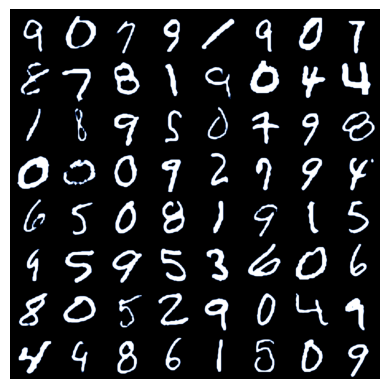

In [29]:
img_grid = torchvision.utils.make_grid(images[:64], nrow=8)

npimg = img_grid.numpy()

plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.axis(False)
plt.show()